# Importing libraries and data

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [2]:
def clean_data(df):
    df=df.drop(columns=['id'])
    df = df[df["bedrooms"] <= 8]
    df = df[(df["bathrooms"] < 6) & (df["bathrooms"] >= 1)]
    df = df[df["sqft_living"] <= 6000]
    df = df[df["sqft_lot"] <= 30000]
    df = df[df["sqft_lot15"] <= 30000]
    df.loc[df["view"] != 0, "view"] = 1
    df = df[df["condition"] > 2]
    df.loc[df["sqft_basement"] != 0, "sqft_basement"] = 1
    df.loc[(df["yr_renovated"]!=0)&(df["yr_renovated"]<2000), "yr_renovated"] = 1
    df.loc[df["yr_renovated"]>=2000, "yr_renovated"] = 2
    
    return df

In [3]:
path = r"..\Data_Midterm.xls"
rs = pd.read_excel(path, engine="xlrd")
rs = clean_data(rs)

In [4]:
rs.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,1.952100e+04
mean,3.362789,2.093143,2017.925209,7861.862507,1.493725,0.005635,0.094104,3.424773,7.605399,1728.814507,0.399980,1970.604528,0.062446,98080.180728,47.562584,-122.225927,1939.434865,7613.022540,5.256298e+05
std,0.886451,0.739045,832.429113,4524.972445,0.544226,0.074856,0.291981,0.638252,1.100004,753.362409,0.489906,29.841867,0.318558,54.229560,0.136479,0.132582,652.600960,3990.658037,3.320386e+05
min,1.000000,1.000000,390.000000,520.000000,1.000000,0.000000,0.000000,3.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.503000,460.000000,651.000000,8.200000e+04
25%,3.000000,1.500000,1410.000000,4997.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.479900,-122.333000,1470.000000,5000.000000,3.180000e+05
50%,3.000000,2.250000,1870.000000,7260.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1973.000000,0.000000,98072.000000,47.574400,-122.257000,1800.000000,7350.000000,4.425000e+05
75%,4.000000,2.500000,2480.000000,9638.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,1.000000,1998.000000,0.000000,98118.000000,47.678600,-122.149000,2290.000000,9375.000000,6.300000e+05
max,8.000000,5.750000,5990.000000,29985.000000,3.500000,1.000000,1.000000,5.000000,13.000000,5844.000000,1.000000,2015.000000,2.000000,98199.000000,47.777600,-121.315000,5790.000000,29985.000000,3.850000e+06


# Regression plots

### We start with plotting every variable against the price.
 It's a simple visualization that will allow us to check how each variable (except the date) is related (or not) to the price.

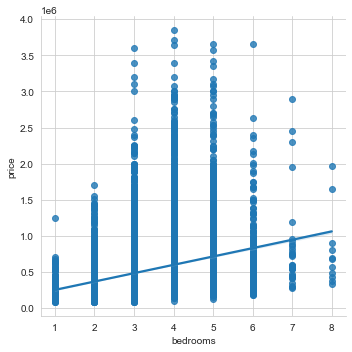

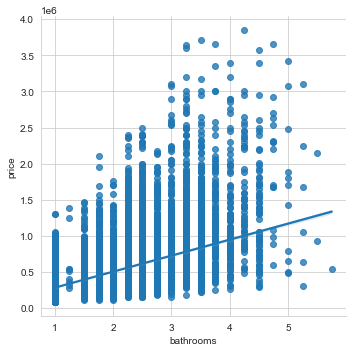

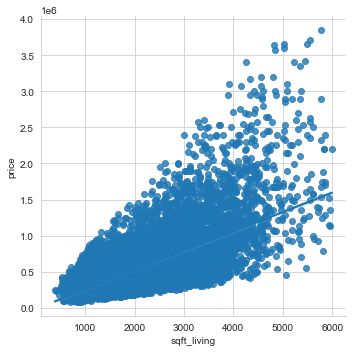

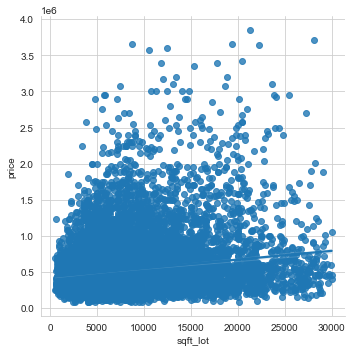

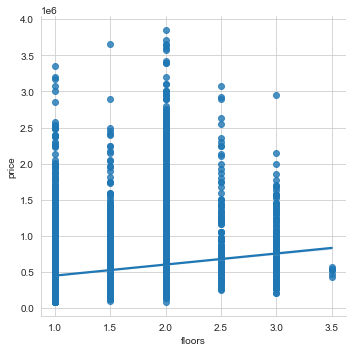

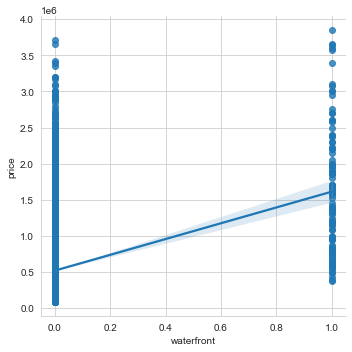

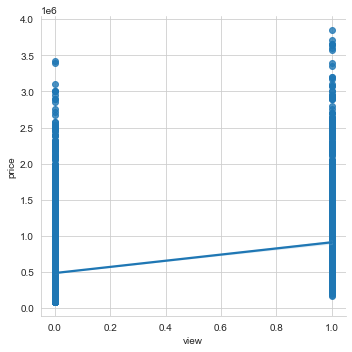

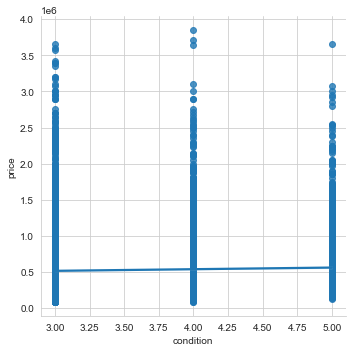

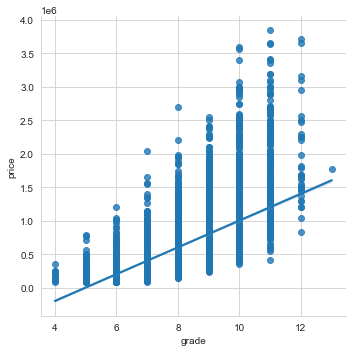

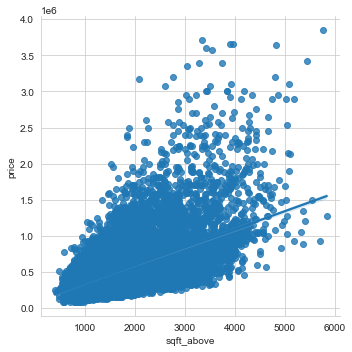

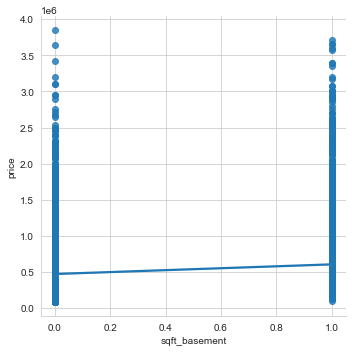

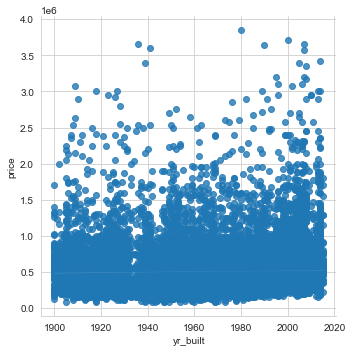

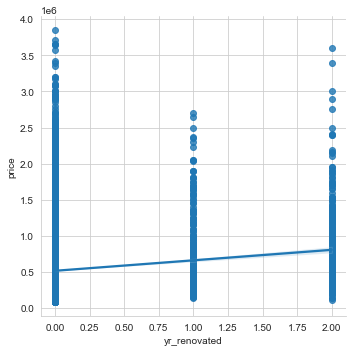

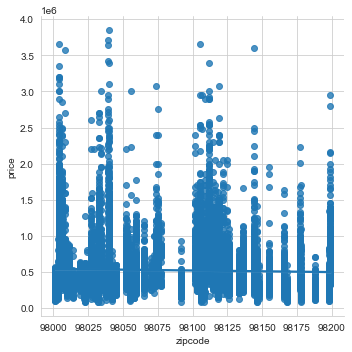

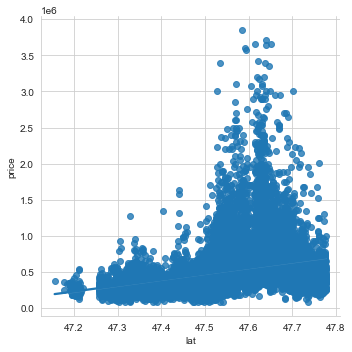

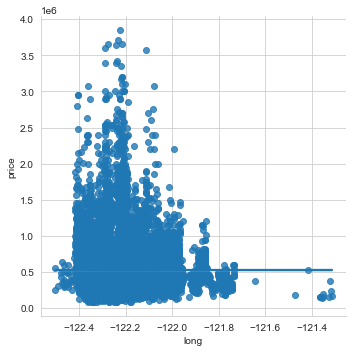

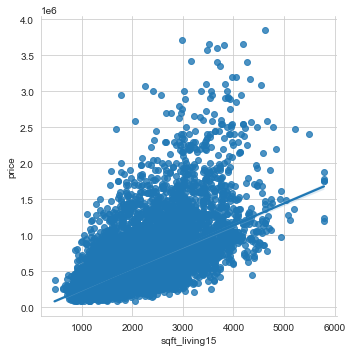

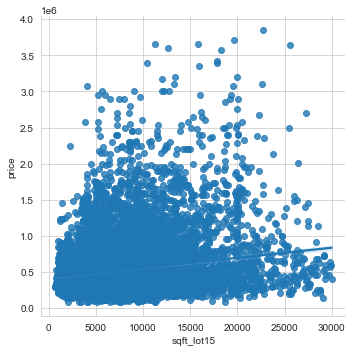

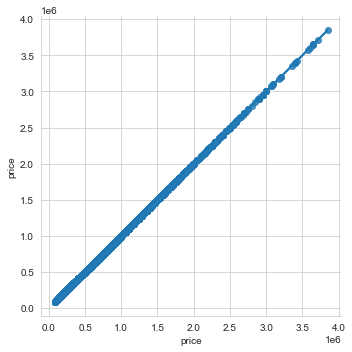

In [34]:
sns.set_style('whitegrid')

for col in rs.columns:
        if col == "date":
            continue
        sns.lmplot(x = col, y ='price', data = rs)

Interesting columns:
- Bedrooms: normal distribution, positive correlation
- Bathrooms: similar
- Sqft living: positive correlation, possibly exponential
- Waterfront: strong correlation for this "boolean" variable.
- View: interesting correlation
- Grade: extremely strong correlation
- Sqft above: very strong correlation and good data distribution
- Sqft living 15: maybe we could eliminate this one or the sqft living one, if they are closely related.


Weaker correlations:
- Sqft lot and sqft lot 15: there is a slight positive correlation but quite weak.
- Floors: same thing as sqft lot.
- Sqft basement: it practically does not affect the price
- Yr renovated: weak correlation.

Location and zipcode: it would be interesting to do a clustering exercise to see if we can convert them into more useful information for a regression.

Non-interesting columns:
- Condition: practically no correlation.
- Yr built: from the data it is very likely that we will not obtain any useful information from this column.


Let's see the heatmap in order to check the correlations between all the variables, including the price

In [37]:
# We don't want the date, or the location and zipcode.
heat_df = rs.drop(["date", "zipcode", "lat", "long"], axis=1)


<AxesSubplot:>

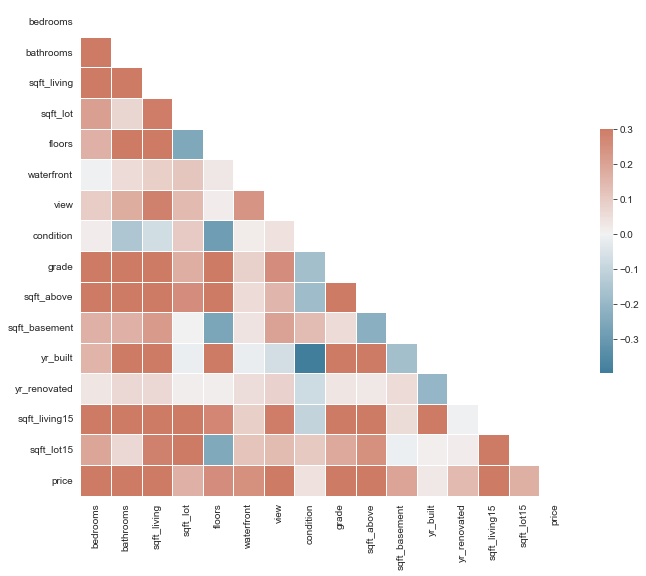

In [39]:
corr = heat_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### The conclusions from the heatmap are interesting: the columns we saw as less interesting have weaker or negative correlations with the price. We will have experiment with three datasets:
1. A full dataset except the date, so including location.
2. A "weak" dataset which will have all the columns except: date, location information, year built and condition. 
3. A "strong" dataset with only the columns where we have observed the best correlations:Bedrooms,Bathrooms, Sqft living, Waterfront, View, Grade, Sqft above, sqft living 15.

In [180]:
full = rs.drop("date", axis=1)
weak = full.drop(["zipcode", "lat", "long", "yr_built", "condition"], axis=1)
strong = weak.drop(["sqft_lot", "sqft_lot15", "floors", "sqft_basement", "yr_renovated"], axis=1)
strong2 = full.drop(["yr_built", "condition"], axis=1)

# Modeling

In [181]:
X_train, X_test, y_train, y_test = train_test_split(strong2.drop("price",axis=1), strong2["price"], random_state=1)


## 1. Linear Regression model

We start with a simple linear regression, where we will use a standard scaler. 

Coefficients: 
 [-23258.76911771 -20475.171587   175236.89095437  48923.9045543
  42154.35090952 118120.94210158 -45770.95613054  14396.81108922]
Mean squared error: 49394802300.38
Coefficient of determination: 0.57


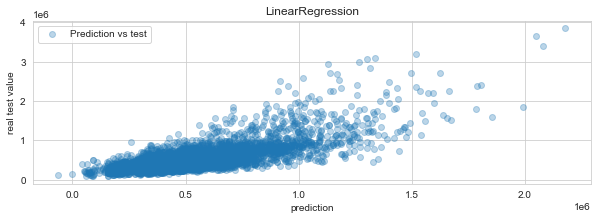

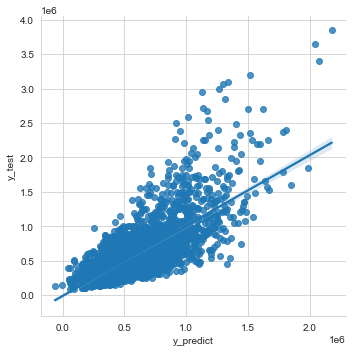

In [142]:
scaler = StandardScaler()
reg = LinearRegression()
pipe = make_pipeline(scaler, reg)
pipe.fit(X_train, y_train)

y_predict = pipe.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predict))
#The mean logistic error
#print('Mean squared logistic error: %.2f' % mean_squared_log_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test,y_predict))

# Plot outputs
fig, axes = plt.subplots(1, 1, figsize=(10, 3))
axes.scatter(y_predict, y_test, alpha=.3, label='Prediction vs test')
axes.set(xlabel='prediction',
            ylabel='real test value', title='LinearRegression')
axes.legend()

sns.lmplot(x = "y_predict", y = "y_test", data = pd.DataFrame(data={"y_predict":y_predict, "y_test":y_test}))

The results are not very good: the mean squared error is 0.494, and the coefficient of determination is 0.57

## 2. Stochastic Gradient Descent Regression

We are going to try another linear regression, the stochastic gradient descent. We operate in similar fashion:

Coefficients: 
 [-24870.01467662  25170.90659472  99727.01831653  -5623.84051915
   8667.44885019  55677.90692316  33425.3496939   23058.75910297
 113633.28104095  30560.27763994   5594.26781841 -76428.44641531
  10404.25072159 -28044.25719368  83587.9068798  -23516.036332
  29113.15501689  -1315.22586926]
Mean squared error: 35037412912.51
Coefficient of determination: 0.70


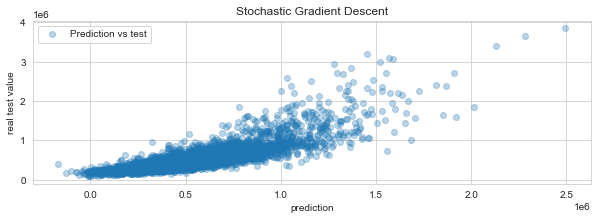

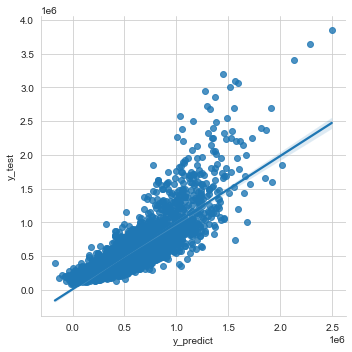

In [127]:
scaler = StandardScaler()
reg = SGDRegressor()
pipe = make_pipeline(scaler, reg)
pipe.fit(X_train, y_train)

y_predict = pipe.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test,y_predict))

# Plot outputs
fig, axes = plt.subplots(1, 1, figsize=(10, 3))
axes.scatter(y_predict, y_test, alpha=.3, label='Prediction vs test')
axes.set(xlabel='prediction',
            ylabel='real test value', title='Stochastic Gradient Descent')
axes.legend()

sns.lmplot(x = "y_predict", y = "y_test", data = pd.DataFrame(data={"y_predict":y_predict, "y_test":y_test}))

### The results are exactly the same as with the linear regression.

## 3. Generalized linear regression

We will try a more complex model of linear regression, to see if we can get better results.

Coefficients: 
 [-0.01544035  0.04345355  0.08871907 -0.01626331 -0.00239372  0.03441844
  0.02998082  0.04478547  0.18229885  0.07627227  0.03449793 -0.09906643
  0.02376247 -0.0744723   0.17251744 -0.0817385   0.05507468 -0.01841517]
Mean squared error: 28398407108.57
Coefficient of determination: 0.75


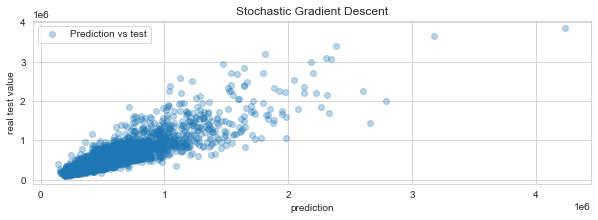

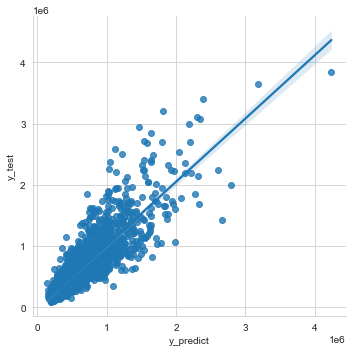

In [145]:
scaler = StandardScaler()
reg = TweedieRegressor(power=0, alpha=0.5, link='log')
pipe = make_pipeline(scaler, reg)
pipe.fit(X_train, y_train)

y_predict = pipe.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test,y_predict))

# Plot outputs
fig, axes = plt.subplots(1, 1, figsize=(10, 3))
axes.scatter(y_predict, y_test, alpha=.3, label='Prediction vs test')
axes.set(xlabel='prediction',
            ylabel='real test value', title='Stochastic Gradient Descent')
axes.legend()

sns.lmplot(x = "y_predict", y = "y_test", data = pd.DataFrame(data={"y_predict":y_predict, "y_test":y_test}))

### The results are getting better: we have a MSE of 45.9% and a coefficient of determination of 60%, with the "strong" dataset. But if we use the full dataset, the results are even better! We have an MSE of 28 and a coefficient of determination of 0.75% 

We  try with:
- Ridge gets the same results as LinearRegression.
- ElasticNet is much worse.
- RANSAC (RANdom SAmple Consensus) even worse (MSE =72).
- Perceptron very bad results.



## 4. Random Forest Regressor

We now try more complex regression systems. Random Forest seems like a good candidate.

Mean squared error: 16066343542.68
Coefficient of determination: 0.86


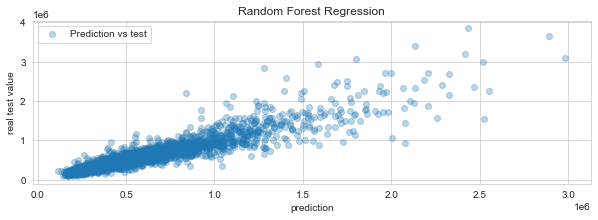

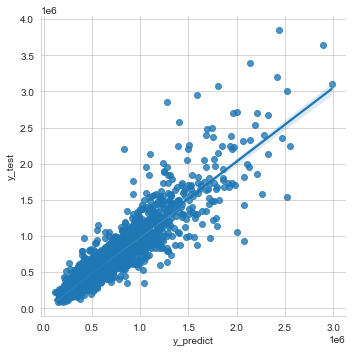

In [182]:
#scaler = StandardScaler()
reg = RandomForestRegressor()
#pipe = make_pipeline(scaler, reg)
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

# The coefficients
#print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test,y_predict))

# Plot outputs
fig, axes = plt.subplots(1, 1, figsize=(10, 3))
axes.scatter(y_predict, y_test, alpha=.3, label='Prediction vs test')
axes.set(xlabel='prediction',
            ylabel='real test value', title='Random Forest Regression')
axes.legend()

sns.lmplot(x = "y_predict", y = "y_test", data = pd.DataFrame(data={"y_predict":y_predict, "y_test":y_test}))

### So far random forest is the best classifier.
- Full dataset: MSE 16%, coefficient of determination 0.86
- Strong: MSE 45%, coefficient of determination 0.60
- Strong with location: MSE 16%, coefficient of determination 0.86
- Weak: MSE 38.44%, coefficient of determination 0.67

We try modifying our most promising dataset: the strong with location. We drop columns and see the results:
- sqft_lot15: MSE 15.9%
- sqft_lot: MSE 16.2%
- floors: MSE 16.3%
- sqft_basement: MSE 15.9%
- year renovated: 16.4%

So the error doesn't improve perceptible by dropping any of those columns. We will use that matrix from now on. But we will try and add a classification model for the location.


# Location classification

We try to create a new vector that, from the location data (lat, long and zipcode) gives a number that 

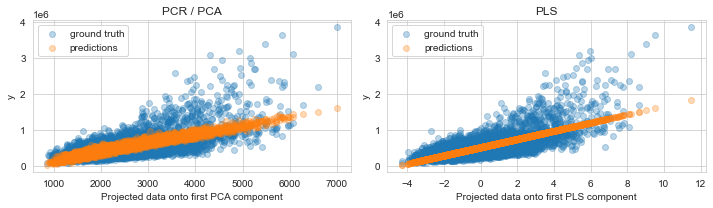

In [53]:
X_train, X_test, y_train, y_test = train_test_split(strong.drop("price",axis=1), strong["price"], random_state=1)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()

axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()
plt.tight_layout()
plt.show()

# Modeling

# Misc

In [33]:
for col in rs.columns:
        print(col," ---", str(type(rs.loc[1,col])))


date  --- <class 'pandas._libs.tslibs.timestamps.Timestamp'>
bedrooms  --- <class 'numpy.int64'>
bathrooms  --- <class 'numpy.float64'>
sqft_living  --- <class 'numpy.int64'>
sqft_lot  --- <class 'numpy.int64'>
floors  --- <class 'numpy.float64'>
waterfront  --- <class 'numpy.int64'>
view  --- <class 'numpy.int64'>
condition  --- <class 'numpy.int64'>
grade  --- <class 'numpy.int64'>
sqft_above  --- <class 'numpy.int64'>
sqft_basement  --- <class 'numpy.int64'>
yr_built  --- <class 'numpy.int64'>
yr_renovated  --- <class 'numpy.int64'>
zipcode  --- <class 'numpy.int64'>
lat  --- <class 'numpy.float64'>
long  --- <class 'numpy.float64'>
sqft_living15  --- <class 'numpy.int64'>
sqft_lot15  --- <class 'numpy.int64'>
price  --- <class 'numpy.int64'>
